### Making pipeline for data preparation

In [1]:
import pandas as pd
import numpy as np
from darts import TimeSeries
    
# Load the electric dataset(CSV) into a Pandas DataFrame
df_el = pd.read_csv('Day-ahead Prices.csv')
# Select the desired columns
df_el = df_el[['MTU (CET/CEST)', 'Day-ahead Price [EUR/MWh]']]

# Rename the columns
df_el = df_el.rename(columns={'MTU (CET/CEST)': 'date', 'Day-ahead Price [EUR/MWh]': 'price'})

# Extract the first 16 characters from the 'date' column
df_el['date'] = df_el['date'].apply(lambda x: x[0:16])

# Drop rows where 'price' column is equal to '-'
df_el.drop(df_el[df_el['price'] == '-'].index, inplace=True)

median_price = df_el['price'].median()
df_el['price'].fillna(median_price, inplace=True) 

df_el['date'] = pd.to_datetime(df_el['date'], format='%d.%m.%Y %H:%M')
ts = TimeSeries.from_dataframe(df_el, time_col='date', value_cols = 'price', fill_missing_dates=False, freq='H')

In [2]:
import pandas as pd
import numpy as np
from darts import TimeSeries
    
# Load the electric dataset(CSV) into a Pandas DataFrame
df_el = pd.read_csv('Day-ahead Prices.csv')
# Select the desired columns
df_el = df_el[['MTU (CET/CEST)', 'Day-ahead Price [EUR/MWh]']]

# Rename the columns
df_el = df_el.rename(columns={'MTU (CET/CEST)': 'date', 'Day-ahead Price [EUR/MWh]': 'price'})

In [3]:
# Extract the first 16 characters from the 'date' column
df_el['date'] = df_el['date'].apply(lambda x: x[0:16])

# Drop rows where 'price' column is equal to '-'
df_el.drop(df_el[df_el['price'] == '-'].index, inplace=True)

In [4]:
df_el.tail()

,date,price
3475,25.05.2023 19:00,59.87
3476,25.05.2023 20:00,64.57
3477,25.05.2023 21:00,106.08
3478,25.05.2023 22:00,65.41
3479,25.05.2023 23:00,59.32


In [5]:
median_price = df_el['price'].median()
df_el['price'].fillna(median_price, inplace=True) 

df_el['date'] = pd.to_datetime(df_el['date'], format='%d.%m.%Y %H:%M')
ts = TimeSeries.from_dataframe(df_el, time_col='date', value_cols = 'price', fill_missing_dates=False, freq='H')

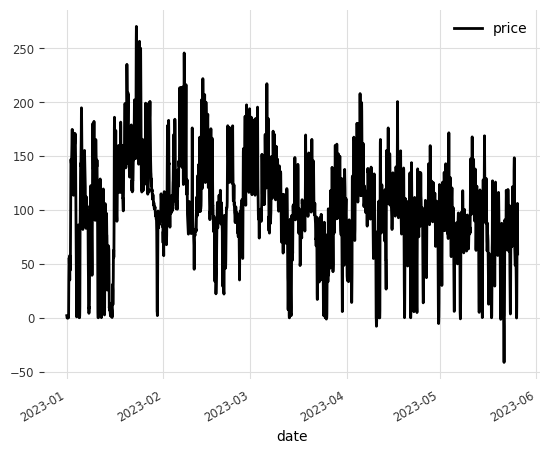

In [6]:
ts.plot()

In [7]:
from datetime import datetime

current_datetime = datetime.now()
formatted_datetime = current_datetime.strftime("%d-%m-%Y 23:00")

print(formatted_datetime)

25-05-2023 23:00


## Using API

In [8]:
import requests
import datetime

In [9]:
from datetime import datetime

current_datetime = datetime.now()
formatted_datetime = current_datetime.strftime("%Y-%m-%d %H:%M")

my token  

79d02170-206a-4f7d-ac31-01b492203cf4

https://transparency.entsoe.eu/content/static_content/Static%20content/web%20api/Guide.html#_available_parameters

#### A.2. Contract_MarketAgreement.Type, Type_MarketAgreement.Type

* A65	System total load : A65
* A.7. ProcessType : A01	Day ahead
* 10YDK-1--------W    BZN|DK1

In [10]:
#url = 'https://web-api.tp.entsoe.eu/api?securityToken=79d02170-206a-4f7d-ac31-01b492203cf4&documentType=A65&processType=A01&outBiddingZone_Domain=10YDK-1--------W&periodStart=202301010000&periodEnd=202305242300'

In [19]:
url = 'https://web-api.tp.entsoe.eu/api?securityToken=79d02170-206a-4f7d-ac31-01b492203cf4&documentType=A25&businessType=B05&contract_MarketAgreement.Type=A01&outBiddingZone_Domain=10YDK-1--------W&auction.Category=A01&classificationSequence_AttributeInstanceComponent.Position=1&periodStart=202301010000&periodEnd=202305242300'

In [ ]:
documentType=A25&businessType=B05&contract_MarketAgreement.Type=A01&outBiddingZone_Domain=10YDK-1--------W&auction.Category=A01&classificationSequence_AttributeInstanceComponent.Position=1&periodStart=202301010000&periodEnd=202305242300

In [32]:
url = 'https://web-api.tp.entsoe.eu/api?securityToken=79d02170-206a-4f7d-ac31-01b492203cf4&documentType=A25&businessType=B07&contract_MarketAgreement.Type=A01&in_Domain=10YAT-APG------L&out_Domain=10YCZ-CEPS-----N&periodStart=201601012300&periodEnd=201601022300'

In [33]:
import csv
response = requests.get(url)

if response.status_code == 200:
    content = response.content.decode('utf-8')  # Decode the response content as UTF-8
    csv_reader = csv.reader(content.splitlines(), delimiter=',')
    data = list(csv_reader)
    # Process the data as needed
else:
    print('Error:', response.status_code)

In [44]:
content

'<?xml version="1.0" encoding="UTF-8"?>\n<Publication_MarketDocument xmlns="urn:iec62325.351:tc57wg16:451-3:publicationdocument:7:0">\n\t<mRID>65c5f601f6844b03baedf9115c434ab7</mRID>\n\t<revisionNumber>1</revisionNumber>\n\t<type>A25</type>\n\t<sender_MarketParticipant.mRID codingScheme="A01">10X1001A1001A450</sender_MarketParticipant.mRID>\n\t<sender_MarketParticipant.marketRole.type>A32</sender_MarketParticipant.marketRole.type>\n\t<receiver_MarketParticipant.mRID codingScheme="A01">10X1001A1001A450</receiver_MarketParticipant.mRID>\n\t<receiver_MarketParticipant.marketRole.type>A33</receiver_MarketParticipant.marketRole.type>\n\t<createdDateTime>2023-05-25T08:35:20Z</createdDateTime>\n\t<period.timeInterval>\n\t\t<start>2016-01-01T23:00Z</start>\n\t\t<end>2016-01-02T23:00Z</end>\n\t</period.timeInterval>\n\t<TimeSeries>\n\t\t<mRID>1</mRID>\n\t\t<auction.mRID>CP_A_Hourly_AT-CZ</auction.mRID>\n\t\t<auction.type>A02</auction.type>\n\t\t<auction.category>A04</auction.category>\n\t\t<bus

In [26]:
df = pd.DataFrame(data[1:], columns=data[0])

ValueError: 1 columns passed, passed data had 2 columns

In [ ]:
df.head()

In [16]:
df_el.isnull().sum()

date     0
price    0
dtype: int64

In [17]:
df_el.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3480 non-null   datetime64[ns]
 1   price   3480 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 54.5+ KB


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16106 entries, 0 to 16105
Data columns (total 1 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   <?xml version="1.0" encoding="UTF-8"?>  16106 non-null  object
dtypes: object(1)
memory usage: 126.0+ KB
